Import packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

In [5]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_comma_sep.csv")
df0.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

Starting **EDA** (exploratory data analysis)

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Non-null values are 14999, consistently for all columns

In [7]:
# Standardizing column names
df0.columns = df0.columns.str.lower()
df0

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

In [8]:
# Checking null values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

No null values. Nice

In [9]:
# Looking for duplicates
df0.duplicated().sum()

3008

3008 duplicates

In [10]:
# Finding duplicates
duplicate_rows = df0[df0.duplicated()]
duplicate_rows.head(5)

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company  work_accident  left  \
396                    139                   3              0     1   
866                    128                   3              0     1   
1317                   127                   3              0     1   
1368                   132                   3              0     1   
1461                   142                   3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [11]:
# Creating a duplicate-free dataframe (df1) 
df1 = df0.drop_duplicates()
df1

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years  department  salary  
0                          0       sales     low  
1                          0       sales  medium  
2                          0       sales  medium  
3                          0       sales     low  
4                          0       sales     low  
...                      ...         ...     ...  
11995                      1  management    high  
11996                      1  management    high  
11997                      1  management    high  
11998                      1   marketing    high  
11999                      0          IT     low  

[11991 rows x 10 columns]

14999-3008 = 11991\
That's consistent.

Let's check whether there are outliers

Text(0.5, 1.0, 'Outliers')

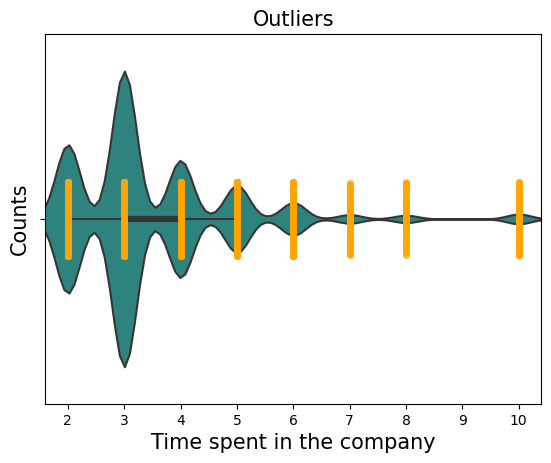

In [13]:
import seaborn as sns

ax = sns.violinplot(data=df0, x="time_spend_company", y=None, alpha=1, palette = "viridis")
ax = sns.stripplot(data=df0, x="time_spend_company", y=None, color='orange', alpha=0.5)
ax.set_xlabel('Time spent in the company', size=15)
ax.set_ylabel('Counts', size=15)
ax.set_title('Outliers', size=15)

Most of the people in the company are there since 3 years. Then follow 2 and 4 years.\
Let's excluse outliers.

In [14]:
# Number of rows containing outliers
Q1 = df1['time_spend_company'].quantile(0.25)
Q3 = df1['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1
IQR
df1.head(3)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium

In [15]:
# Defining quantiles and limits to exclude outliers
p25 = df1['time_spend_company'].quantile(0.25)
p50 = df1['time_spend_company'].quantile(0.50)
p75 = df1['time_spend_company'].quantile(0.75)

iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['time_spend_company'] > upper_limit) | (df1['time_spend_company'] < lower_limit)]
print('The number of outliers is:', len(outliers))

Lower limit: 1.5
Upper limit: 5.5
The number of outliers is: 824


How many employees left or remained?

In [16]:
# Getting the numbers of people who left vs. stayed, nominally
stayed, left = df1["left"].value_counts()
print('Nominal:')
print(f"stayed: {stayed}, left: {left}")
print(' ')
# Getting the percentages of people who left vs. stayed, normalized
stayed_norm, left_norm = df1["left"].value_counts(normalize = True)
print('Normalized:')
print(f"stayed: {stayed_norm*100:.3f}%, left: {left_norm*100:.3f}%")

Nominal:
stayed: 10000, left: 1991
 
Normalized:
stayed: 83.396%, left: 16.604%


Let's start looking for relations

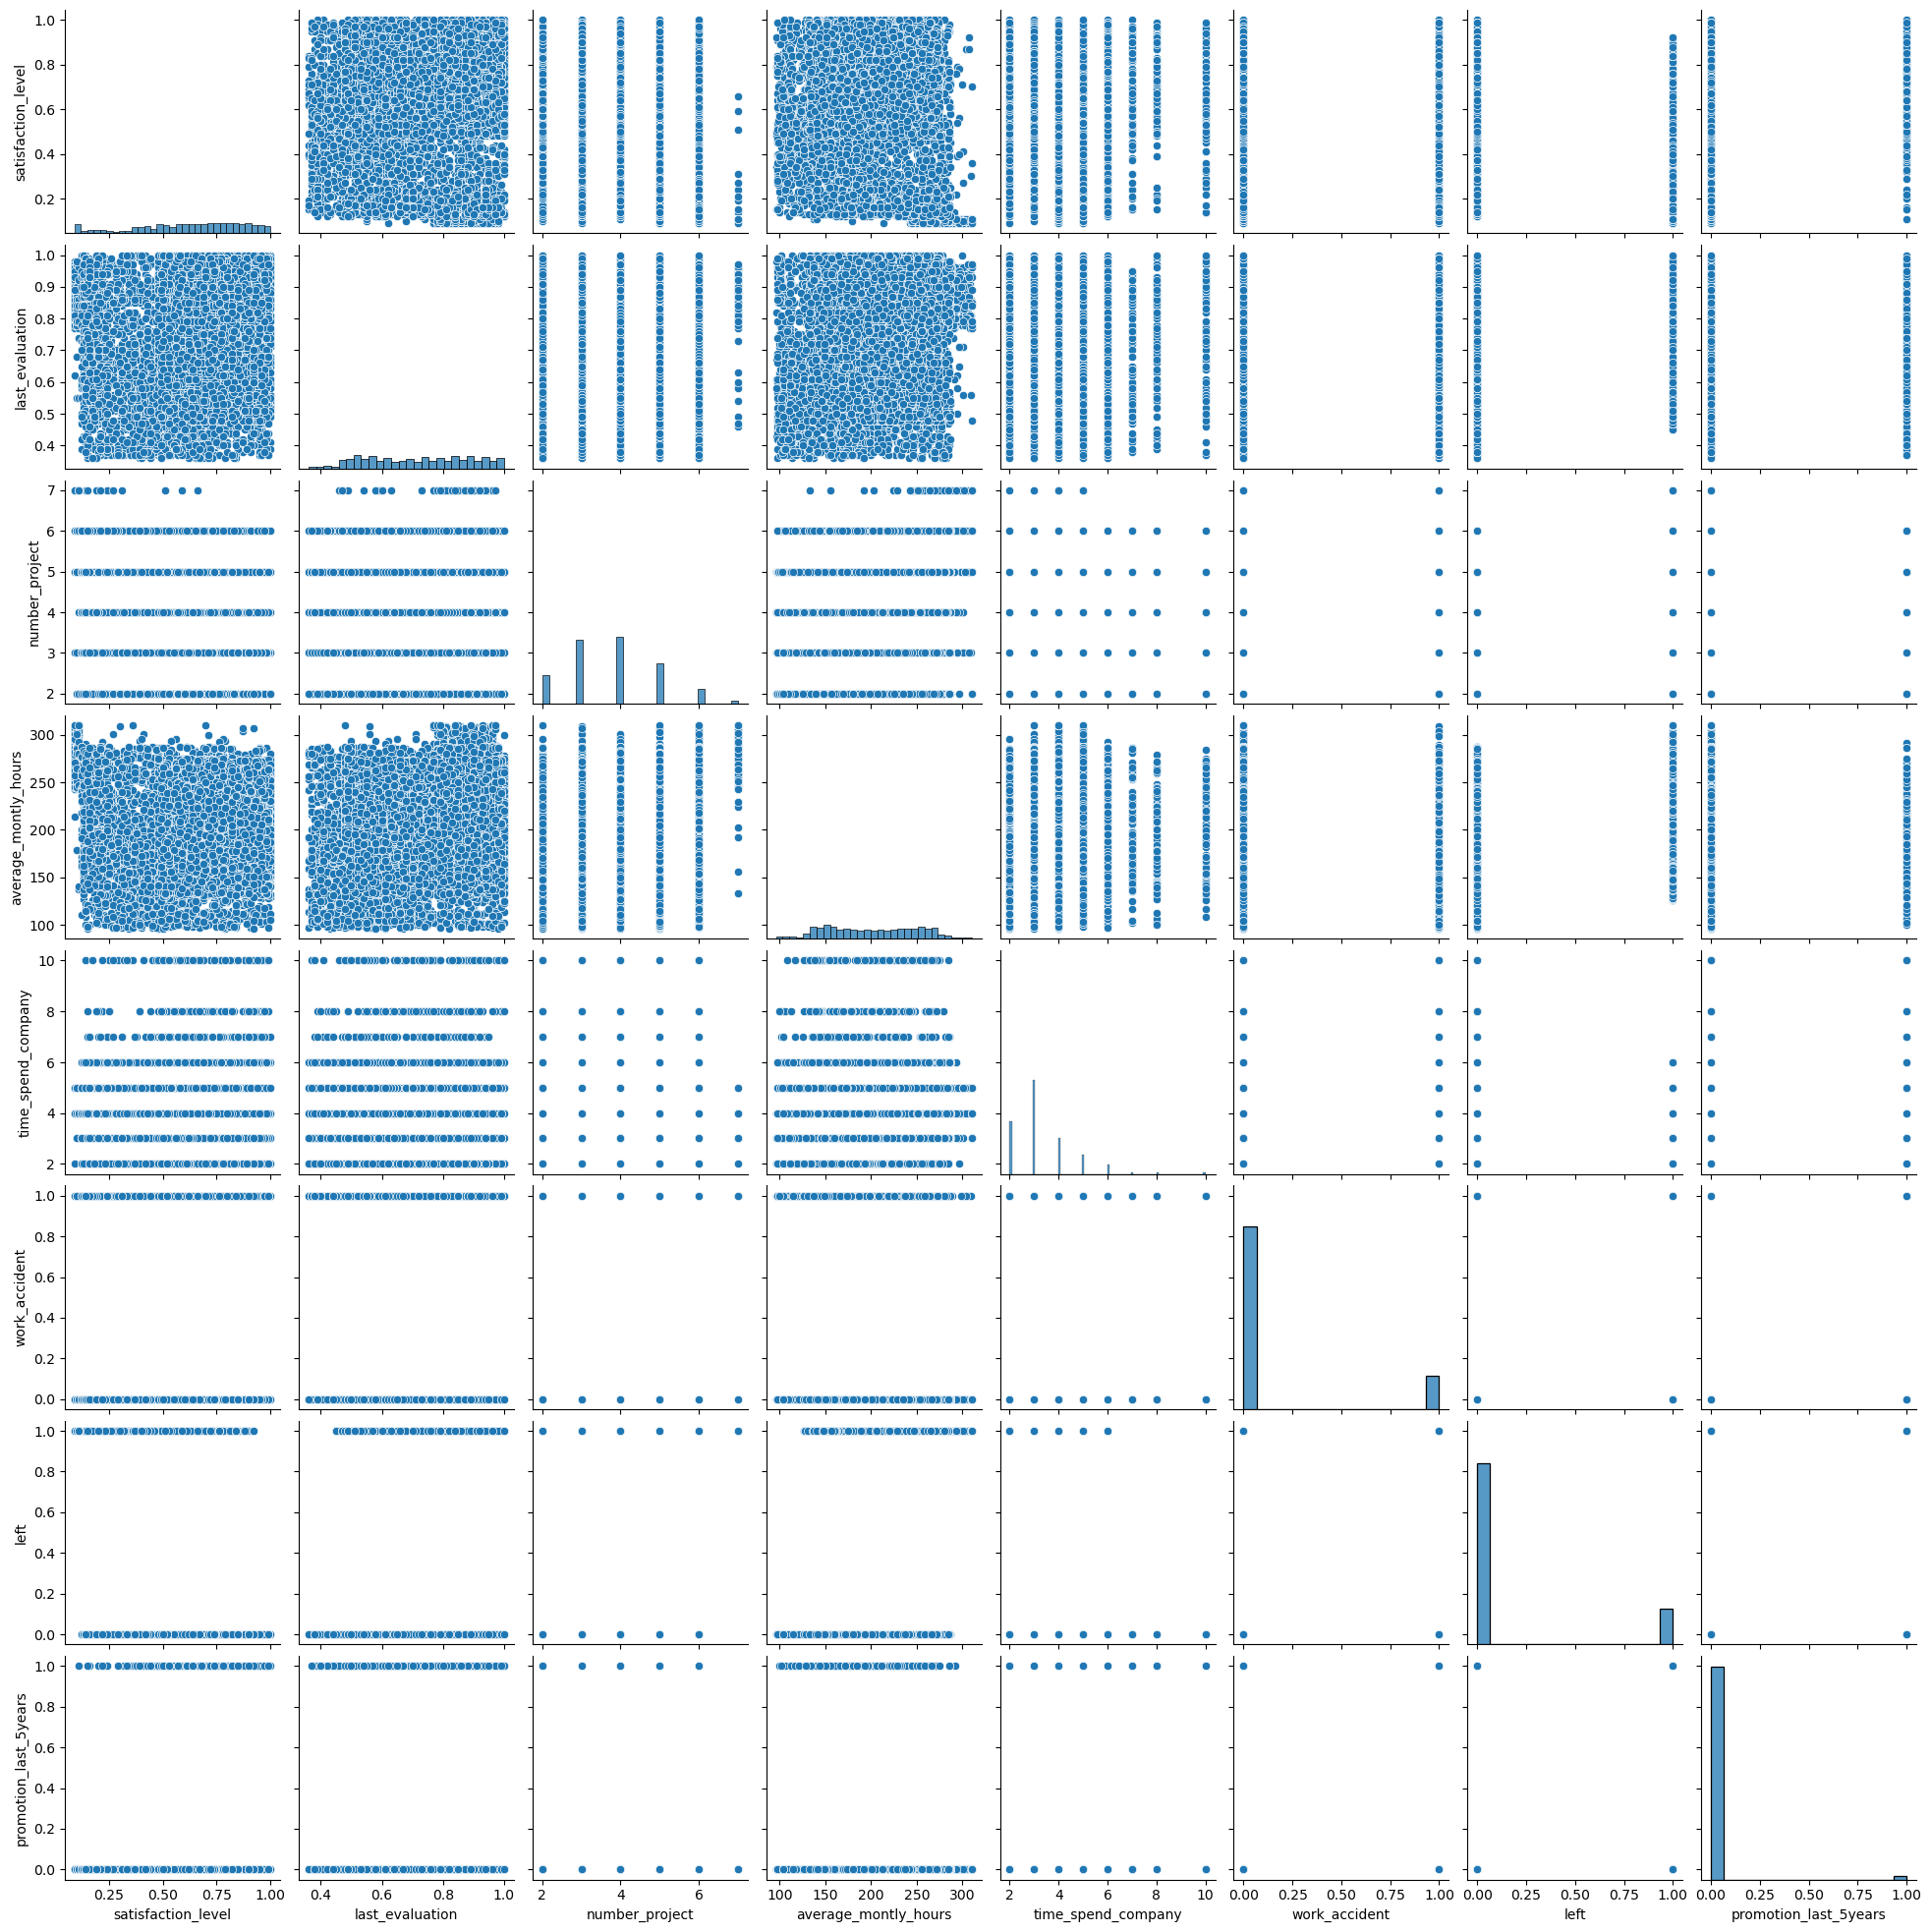

In [17]:
# Creating a pairplot
sns.pairplot(df1)

/var/folders/kb/dqgsjn6j11n2k29h8qr4308m0000gn/T/ipykernel_27530/3431186376.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("viridis_r", as_cmap=True))


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'satisfaction_level'),
  Text(1.5, 0, 'last_evaluation'),
  Text(2.5, 0, 'number_project'),
  Text(3.5, 0, 'average_montly_hours'),
  Text(4.5, 0, 'time_spend_company'),
  Text(5.5, 0, 'work_accident'),
  Text(6.5, 0, 'left'),
  Text(7.5, 0, 'promotion_last_5years')])

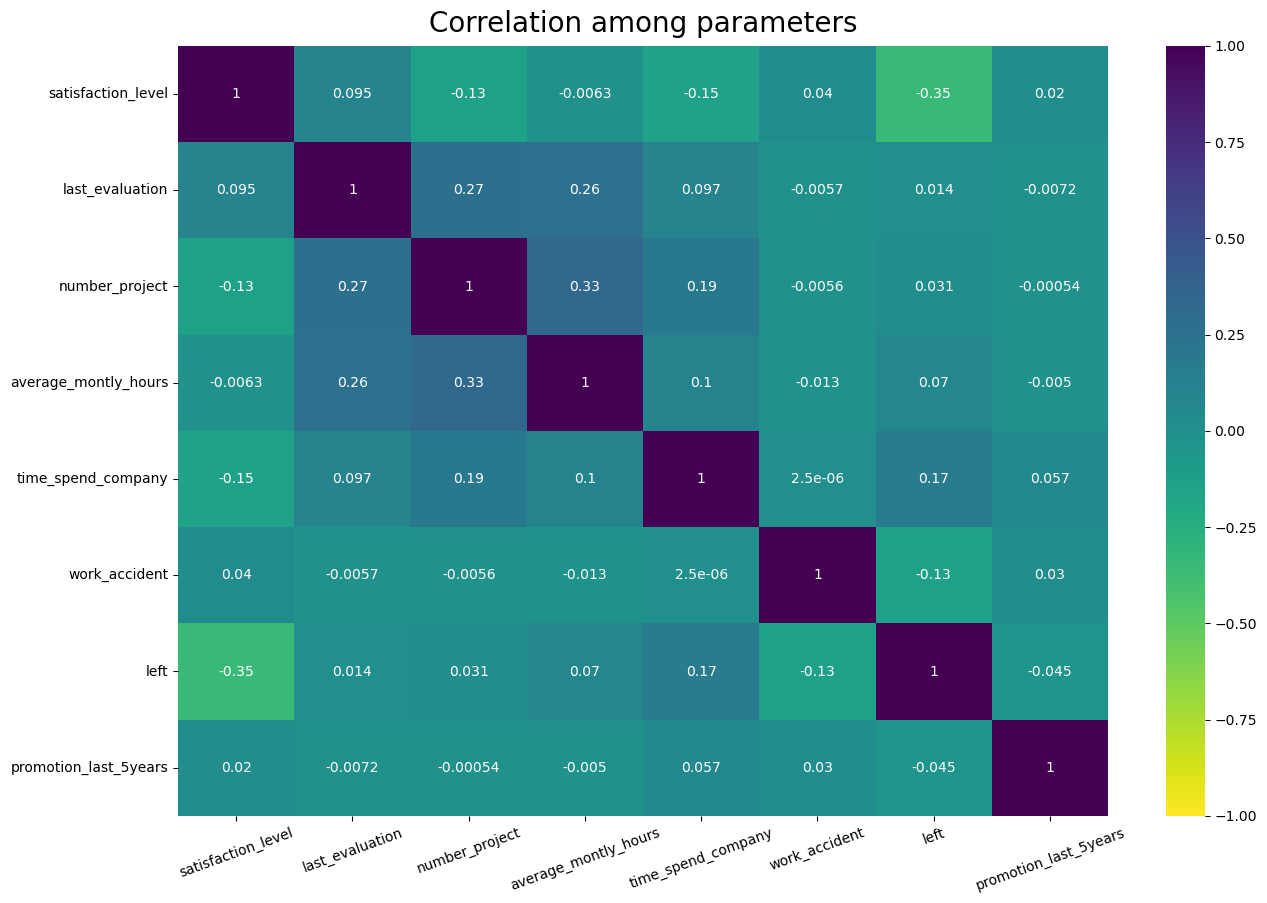

In [18]:
# Creating a heatmap
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("viridis_r", as_cmap=True))
heatmap.set_title('Correlation among parameters', fontdict={'fontsize':20}, pad=10);
plt.xticks(rotation='20')

There are clear correlation in the dataset. Most **correlated parameters** are:
1. **number_project** w/ **last_evaluation**
2. **average_montly_hours** w/ **last_evaluation** & **number_project**
3. **time_spend_company** w/ **number_project**
4. **left** w/ **time_spend_company**

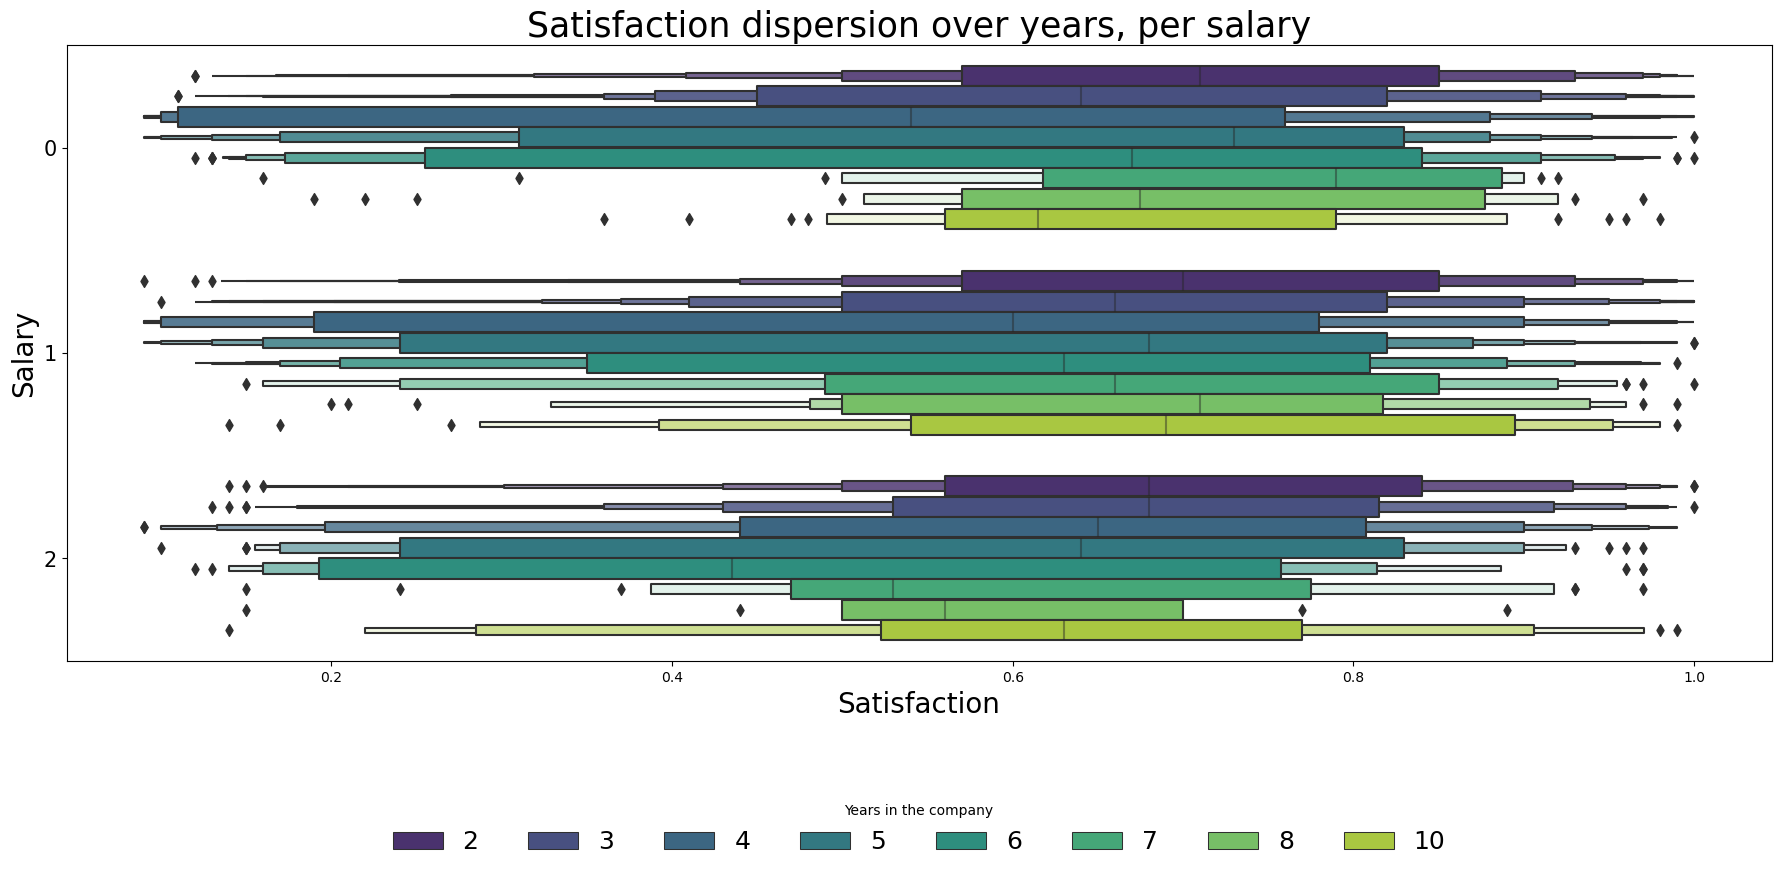

In [19]:
# Creating a boxenplot
fig, ax = plt.subplots(figsize = (22,8))

ax = sns.boxenplot(x=df1["satisfaction_level"], y=df1["salary"], hue = df1["time_spend_company"], k_depth="trustworthy", palette = "viridis")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, -0.35), ncol=8, title="Years in the company", frameon=False, fontsize=18, 
)
plt.ylabel("Salary", fontsize=20)
plt.xlabel("Satisfaction", fontsize=20)
plt.title("Satisfaction dispersion over years, per salary", fontsize=25)
ax.set_yticklabels(ax.get_yticks(), size = 15)

plt.show()

It seems that the dispersion of satisfaction related to salary is more or less independent of the years in the company. To note, satisfaction values are more dispersed in central years in the company.

/var/folders/kb/dqgsjn6j11n2k29h8qr4308m0000gn/T/ipykernel_27530/4181335141.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticks(), size = 15)
/var/folders/kb/dqgsjn6j11n2k29h8qr4308m0000gn/T/ipykernel_27530/4181335141.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(ax[i].get_yticks(), size = 15)
/var/folders/kb/dqgsjn6j11n2k29h8qr4308m0000gn/T/ipykernel_27530/4181335141.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticks(), size = 15)


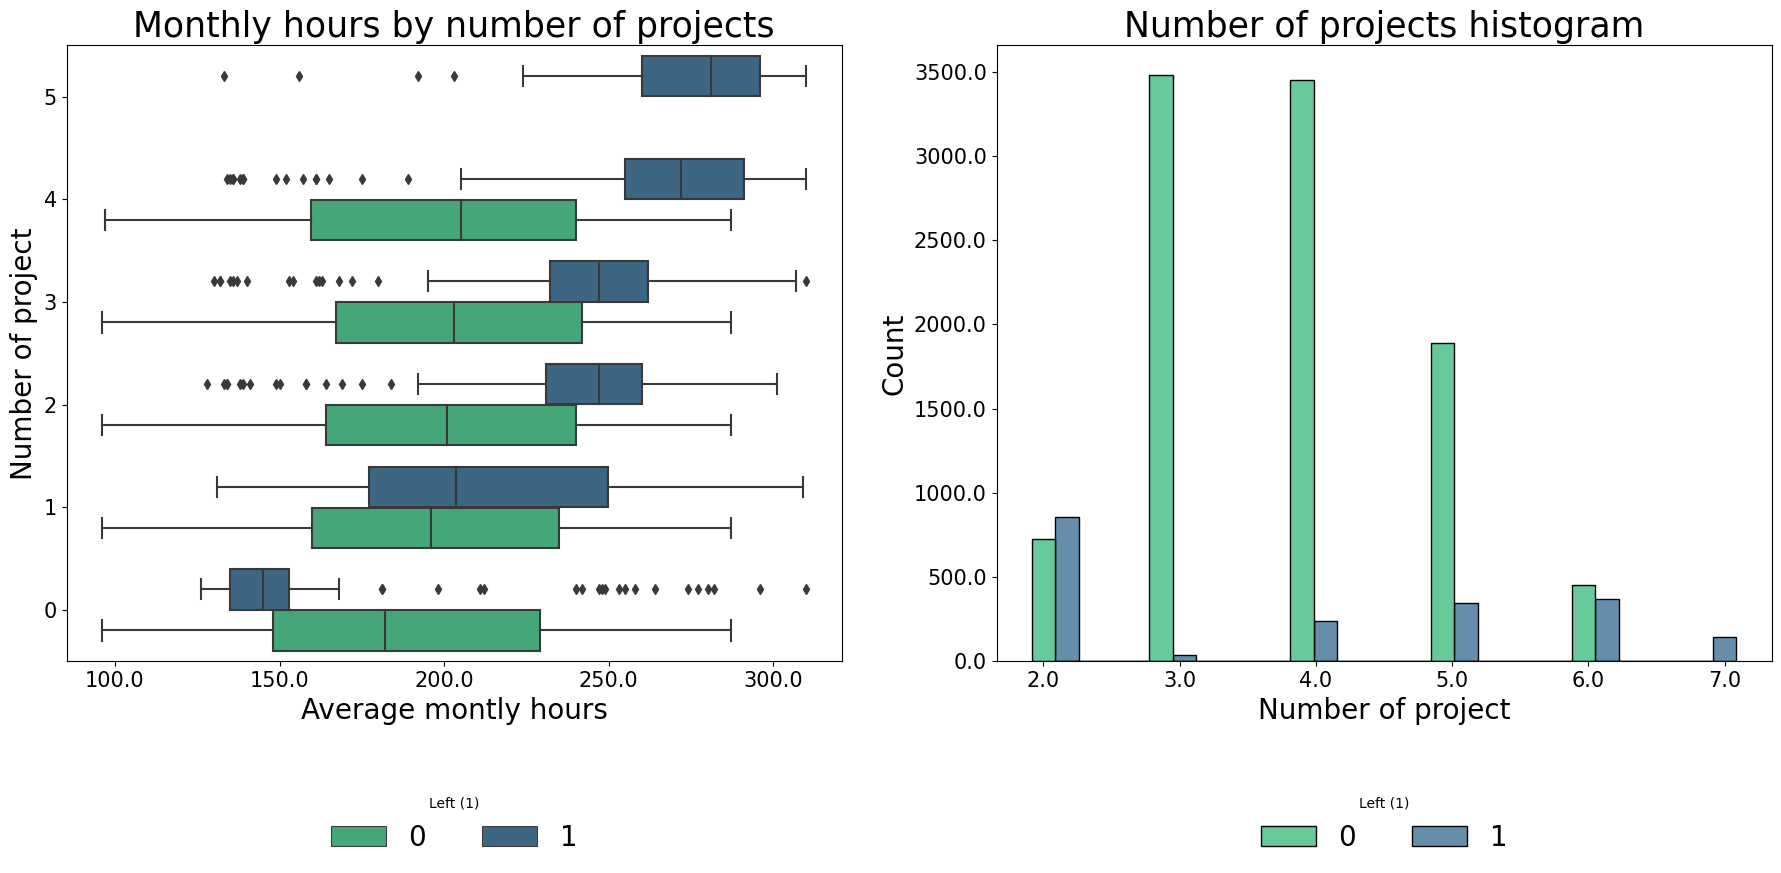

In [20]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_montly_hours', y='number_project', hue='left', orient="h", ax=ax[0], dodge=True, palette = "viridis_r")
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='25')
ax[0].set_ylabel("Number of project", fontsize=20)
ax[0].set_xlabel("Average montly hours", fontsize=20)

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1], palette = "viridis_r")
ax[1].set_title('Number of projects histogram', fontsize='25')
ax[1].set_ylabel("Count", fontsize=20)
ax[1].set_xlabel("Number of project", fontsize=20)

for i in range(0,2):
    sns.move_legend(
        ax[i], "lower center",
        bbox_to_anchor=(.5, -0.35), ncol=2, title="Left (1)", frameon=False, fontsize=20
    )
    ax[i].set_yticklabels(ax[i].get_yticks(), size = 15)
    ax[i].set_xticklabels(ax[i].get_xticks(), size = 15)


    # Display the plots
plt.show()

It seems that there is a trend.

Some considerations on the plot on left:
1. q3-q1, i.e. 50% of the observations, are consistently more concentrated for people that left 
   than those who remained. To consider that the altter are 5 times fewer (it explains dispersion).
2. Peolpe that left tent to work way more. We have a variable to consider, next: **average monthly hours**.
3. All people with 7 projects left. To verify.
4. Number of project effect seeems to be minor.

Some considerations on the plot on right:
1. Most of the people are working on 3, 4 and 5 projects.
2. Pople that left have are located at low and high number of project values.
3. second variable to consider: __number of project__.

In [21]:
# Counting people that had 7 projects
not_seven, seven = (df1['number_project'] == 7).value_counts()
print(f'not_seven: {not_seven}, seven: {seven}')
print('check #tot:', not_seven+seven)

not_seven: 11846, seven: 145
check #tot: 11991


In [22]:
# Counting people that had 7 projects and left
seven_left = df1[df1['number_project'] == 7]['left'].value_counts()
print(seven_left)

1    145
Name: left, dtype: int64


All emploees with 7 projects left.

Good, now let's have a look at the infuence of monthly hours

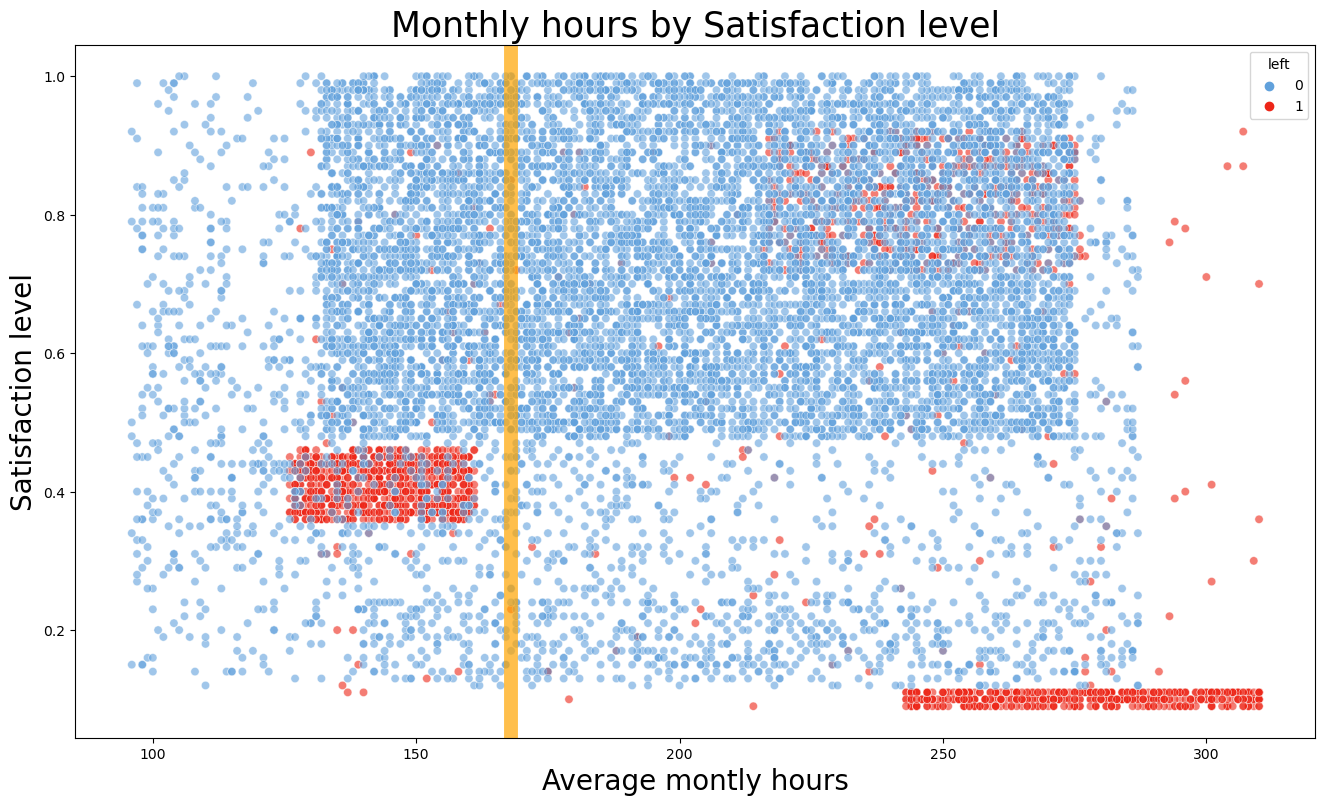

In [23]:
# Checking the infuence of satisfaction over monthly hours
ax = plt.figure(figsize=(16, 9))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.scatterplot(data=df1, x='average_montly_hours', y='satisfaction_level', hue='left', palette = ['#61a1dc', '#ed2618'], alpha = 0.6)

plt.title('Monthly hours by Satisfaction level', fontsize='25')
plt.ylabel("Satisfaction level", fontsize=20)
plt.xlabel("Average montly hours", fontsize=20)

"considering 40x4+8 as a typical monthly hours"
plt.axvline(x = 168, color = 'orange', label = 'normal monthly hours', lw = 10, alpha = 0.7)


The orange line delimits an average of 168 hours/month.\
Many people work more than that.\
It seems there are 3 red (1 = left) groups of people.\
Less satisfied people are the ones working the most.

'considering 40x4+8 as a typical monthly hours'

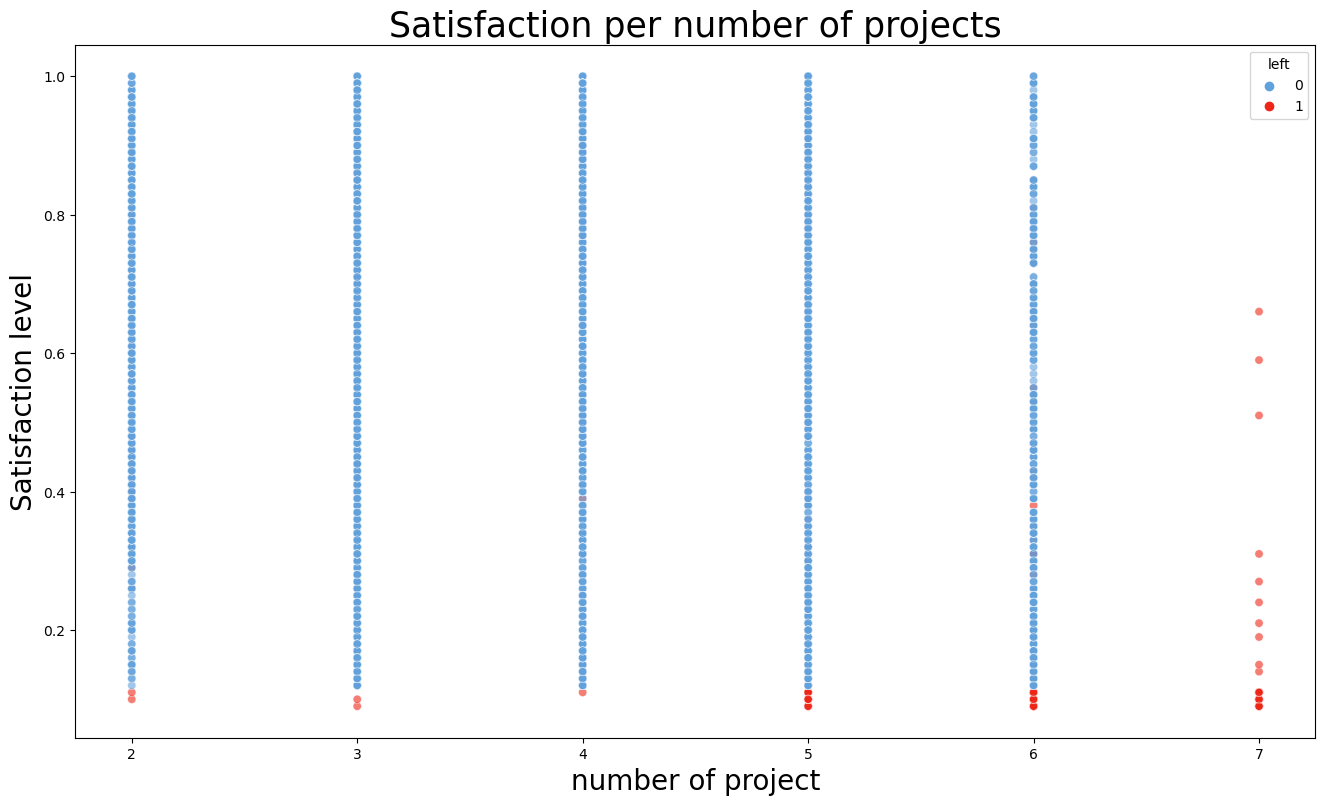

In [24]:
# Checking satisfaction level over number of projects
ax = plt.figure(figsize=(16, 9))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.scatterplot(data=df1, x='number_project', y='satisfaction_level', hue='left', palette = ['#61a1dc', '#ed2618'], alpha = 0.6)

plt.title('Satisfaction per number of projects', fontsize='25')
plt.ylabel("Satisfaction level", fontsize=20)
plt.xlabel("number of project", fontsize=20)

"considering 40x4+8 as a typical monthly hours"

/var/folders/kb/dqgsjn6j11n2k29h8qr4308m0000gn/T/ipykernel_27530/3377927068.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticks(), size = 15)
/var/folders/kb/dqgsjn6j11n2k29h8qr4308m0000gn/T/ipykernel_27530/3377927068.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(ax[i].get_yticks(), size = 15)
/var/folders/kb/dqgsjn6j11n2k29h8qr4308m0000gn/T/ipykernel_27530/3377927068.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticks(), size = 15)


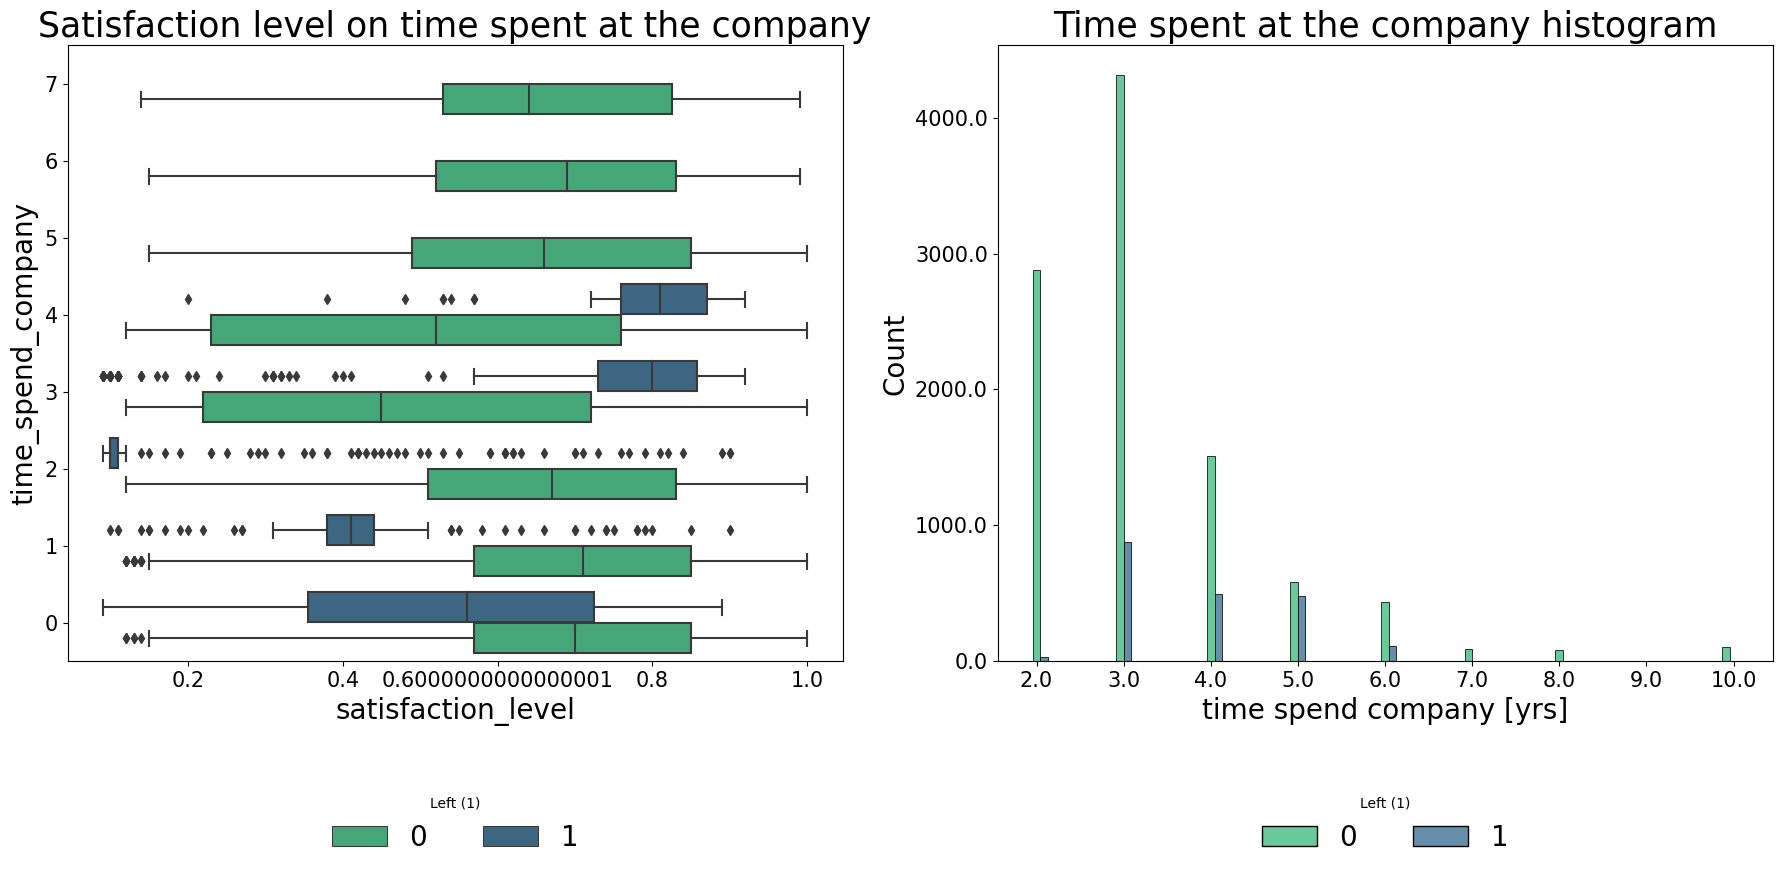

In [25]:
# Checking satisfaction level over the time at the company
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='time_spend_company', hue='left', orient="h", ax=ax[0], dodge=True, palette = "viridis_r")
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level on time spent at the company', fontsize='25')
ax[0].set_ylabel("time_spend_company", fontsize=20)
ax[0].set_xlabel("satisfaction_level", fontsize=20)

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['time_spend_company']
tenure_left = df1[df1['left']==1]['time_spend_company']
sns.histplot(data=df1, x='time_spend_company', hue='left', multiple='dodge', shrink=2, ax=ax[1], palette = "viridis_r")
ax[1].set_title('Time spent at the company histogram', fontsize='25')
ax[1].set_ylabel("Count", fontsize=20)
ax[1].set_xlabel("time spend company [yrs]", fontsize=20)

for i in range(0,2):
    sns.move_legend(
        ax[i], "lower center",
        bbox_to_anchor=(.5, -0.35), ncol=2, title="Left (1)", frameon=False, fontsize=20
    )
    ax[i].set_yticklabels(ax[i].get_yticks(), size = 15)
    ax[i].set_xticklabels(ax[i].get_xticks(), size = 15)


    # Display the plots
plt.show()

Let's calculate means and the medians of various parameters focusing on the left\remanied caracteristic.

In [26]:
df1.groupby(['left']).mean()

/var/folders/kb/dqgsjn6j11n2k29h8qr4308m0000gn/T/ipykernel_27530/717480713.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['left']).mean()


satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.667365         0.715667        3.786800   
1               0.440271         0.721783        3.883476   

      average_montly_hours  time_spend_company  work_accident  \
left                                                            
0                198.94270            3.262000       0.174500   
1                208.16223            3.881467       0.052737   

      promotion_last_5years  
left                         
0                  0.019500  
1                  0.004018

In [27]:
df1.groupby(['left']).median()

/var/folders/kb/dqgsjn6j11n2k29h8qr4308m0000gn/T/ipykernel_27530/1066973218.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['left']).median()


satisfaction_level  last_evaluation  number_project  \
left                                                        
0                   0.69             0.71             4.0   
1                   0.41             0.79             4.0   

      average_montly_hours  time_spend_company  work_accident  \
left                                                            
0                    198.0                 3.0            0.0   
1                    226.0                 4.0            0.0   

      promotion_last_5years  
left                         
0                       0.0  
1                       0.0

Now having a better statistical grasp

In [28]:
df1.groupby(['left']).describe()

satisfaction_level                                                    \
                  count      mean       std   min   25%   50%   75%   max   
left                                                                        
0               10000.0  0.667365  0.217082  0.12  0.54  0.69  0.84  1.00   
1                1991.0  0.440271  0.265207  0.09  0.11  0.41  0.73  0.92   

     last_evaluation                                                   \
               count      mean       std   min   25%   50%   75%  max   
left                                                                    
0            10000.0  0.715667  0.161919  0.36  0.58  0.71  0.85  1.0   
1             1991.0  0.721783  0.197436  0.45  0.52  0.79  0.91  1.0   

     number_project                                               \
              count      mean       std  min  25%  50%  75%  max   
left                                                               
0           10000.0  3.786800  0.981755  2.0  3.0  4.0  4.0  6.0   
1            1991.0  3.883476  1.817139  2.0  2.0  4.0  6.0  7.0   

     average_montly_hours                                                    \
                    count       mean        std    min    25%    50%    75%   
left                                                                          
0                 10000.0  198.94270  45.665507   96.0  162.0  198.0  238.0   
1                  1991.0  208.16223  61.295145  126.0  146.0  226.0  262.5   

            time_spend_company                                                \
        max              count      mean       std  min  25%  50%  75%   max   
left                                                                           
0     287.0            10000.0  3.262000  1.367239  2.0  2.0  3.0  4.0  10.0   
1     310.0             1991.0  3.881467  0.974041  2.0  3.0  4.0  5.0   6.0   

     work_accident                                               \
             count      mean       std  min  25%  50%  75%  max   
left                                                              
0          10000.0  0.174500  0.379558  0.0  0.0  0.0  0.0  1.0   
1           1991.0  0.052737  0.223565  0.0  0.0  0.0  0.0  1.0   

     promotion_last_5years                                               
                     count      mean       std  min  25%  50%  75%  max  
left                                                                     
0                  10000.0  0.019500  0.138281  0.0  0.0  0.0  0.0  1.0  
1                   1991.0  0.004018  0.063277  0.0  0.0  0.0  0.0  1.0

Also here, something interesting emerged: 
1. Even though **satisfaction level** is considerably higher for 0 (in all quartiles), \
   **last evaluation** goes with an inversion proportionality.
2. **average_montly_hours** is higher (confirmed above) for those who left.
3. It seems that people that had **work_accident** tend to remain in the company. Is it right?\
   if so, might it be for gratitude?
4. **promotion_last_5years** is interesting. \
    Medians are both 0, but mean are almost 5x for 0.
Irrelevant relations among 0 and 1:
1. **number_project**, same trend and same numbers.
2. **time_spend_company** does not seem interesting.

Text(0.5, 1.0, 'Promotion last 5 years over average monthly hours')

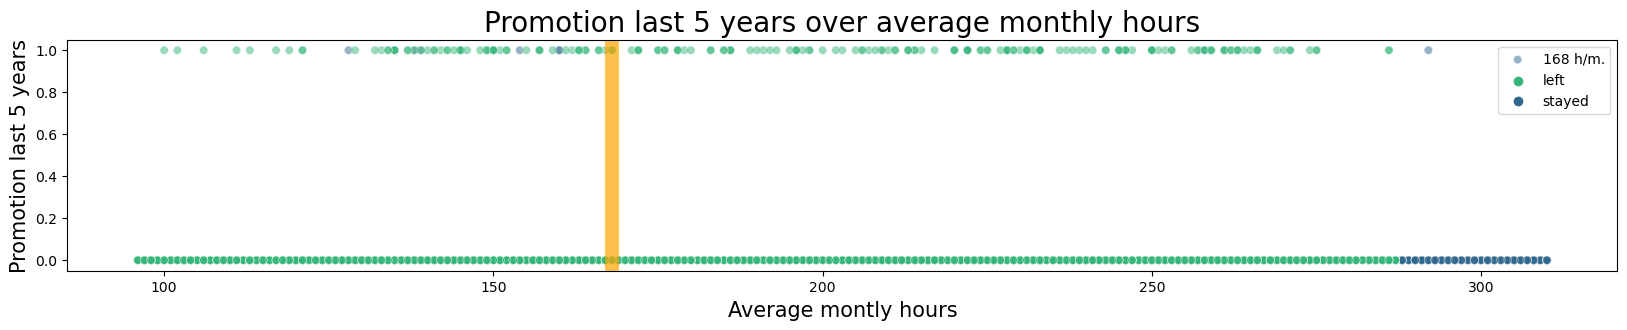

In [29]:
# Checking promotion last 5 years over average monthly hours

plt.figure(figsize=(20, 3))
sns.scatterplot(data=df1, x='average_montly_hours', y='promotion_last_5years', hue='left', alpha=0.5, palette='viridis_r')
plt.axvline(x = 168, color = 'orange', label = 'normal monthly hours', lw = 10, alpha = 0.7)
plt.legend(labels=['168 h/m.', 'left', 'stayed'])
plt.xlabel("Average montly hours", fontsize=15)
plt.ylabel("Promotion last 5 years", fontsize=15)
plt.title("Promotion last 5 years over average monthly hours", fontsize=20)


It seems there a treashold over which people leave (~290 h), regardless recieveing a promotion.\
No correlation between promotion and leaving

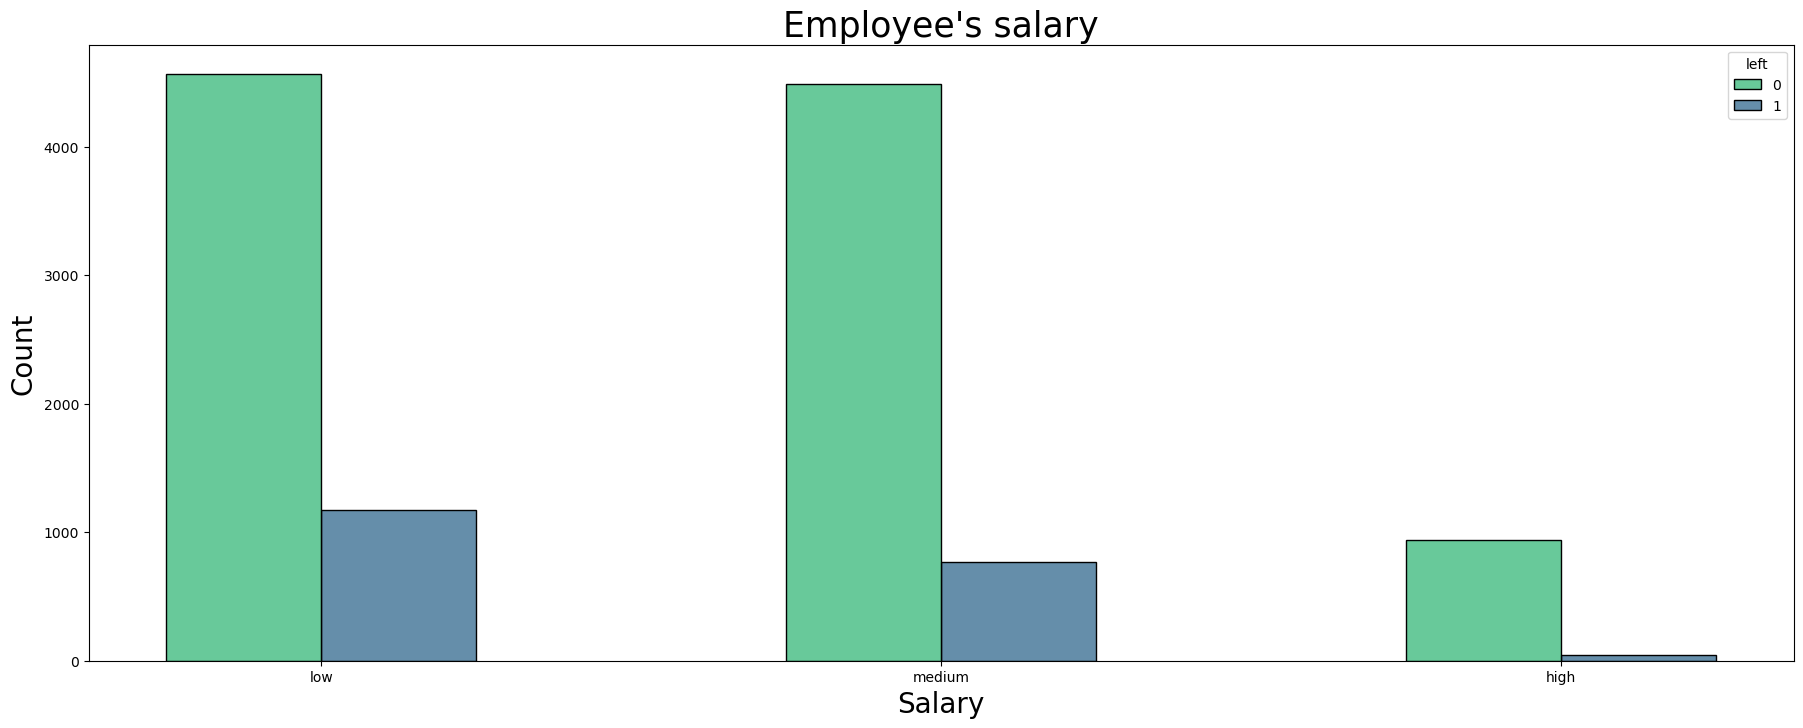

In [30]:
# Checking salary influences
fig, ax = plt.subplots(figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['salary']
tenure_left = df1[df1['left']==1]['salary']

sns.histplot(data=df1, x='salary', hue='left', multiple='dodge', shrink=0.5, ax=ax, palette = "viridis_r")
ax.set_title("Employee's salary", fontsize='25')
ax.set_xlabel("Salary", fontsize=20)
ax.set_ylabel("Count", fontsize=20)

plt.show()

And people seem to leave regardless their salaries.

Ok, now let's consider what are the most affected departments.

In [31]:
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0, 0.5, 'Count')

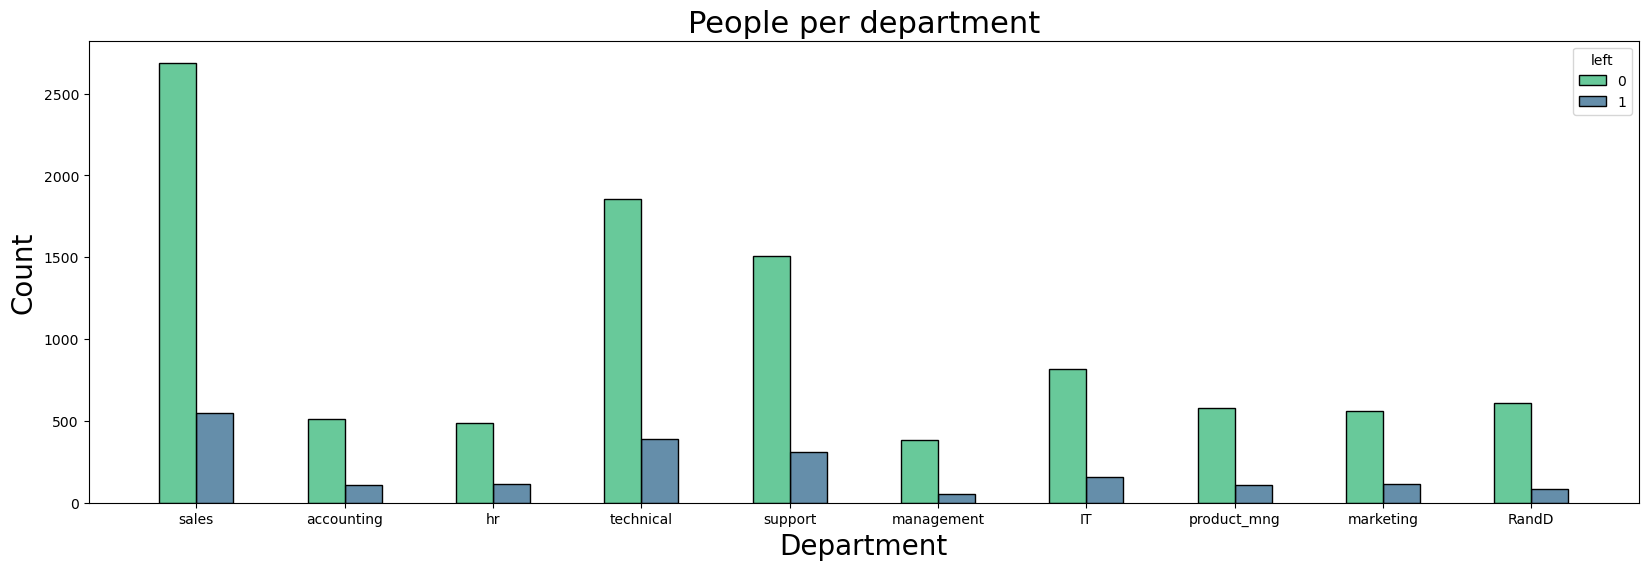

In [34]:
# Checking people per department
fig = plt.figure(figsize=(20,6))
sns.histplot(data=df1, x='department', hue='left', discrete=1, hue_order=[0, 1], shrink=0.5, multiple='dodge', palette = "viridis_r")
# plt.xticks(rotation='45')
plt.title('People per department', fontsize='22')
plt.xlabel("Department", fontsize=20)
plt.ylabel("Count", fontsize=20)

Most of the people are in **Sales**, **technical** and **support departments**, but leaving the company does not seem to be department related.

Text(0.5, 0, 'Last evaluation')

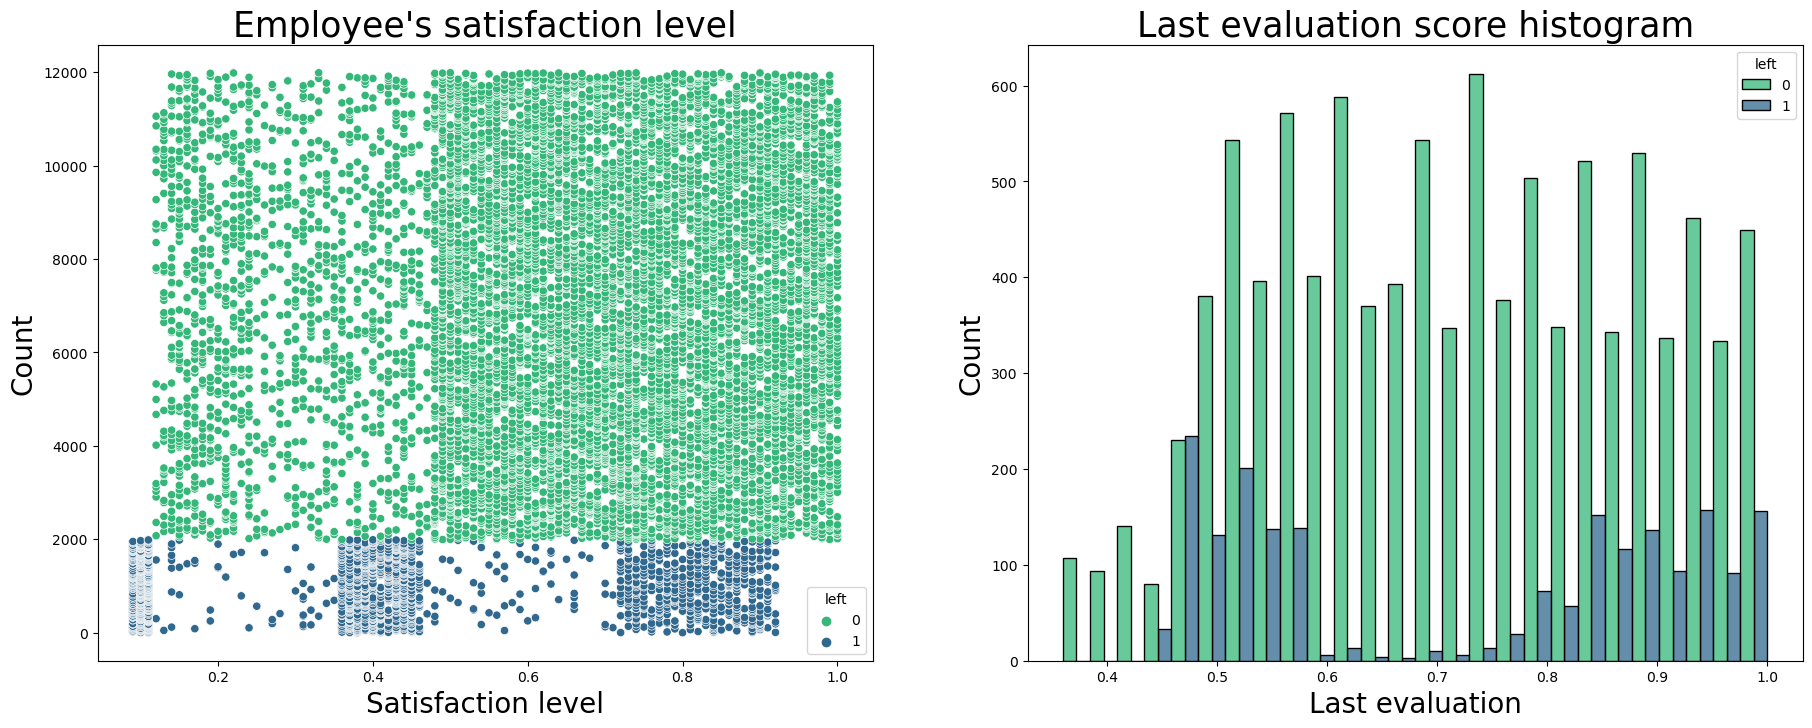

In [35]:
# Checking Employee's satisfaction level over Last evaluation score 
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['satisfaction_level']
tenure_left = df1[df1['left']==1]['satisfaction_level']

sns.scatterplot(data=df1, x='satisfaction_level', y=range(0,len(df1["satisfaction_level"])), hue='left', palette = "viridis_r", ax=ax[0])
ax[0].set_title("Employee's satisfaction level", fontsize='25')
ax[0].set_ylabel("Count", fontsize=20)
ax[0].set_xlabel("Satisfaction level", fontsize=20)

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['last_evaluation']
tenure_left = df1[df1['left']==1]['last_evaluation']
sns.histplot(data=df1, x='last_evaluation', hue='left', multiple='dodge', shrink=1, ax=ax[1], palette = "viridis_r")
ax[1].set_title('Last evaluation score histogram', fontsize='25')
ax[1].set_ylabel("Count", fontsize=20)
ax[1].set_xlabel("Last evaluation", fontsize=20)

Interesting results!
1. Left plot:\
    a. 0s seems to have **3 distributions (in homogeneity)**\
    b. **same for 1s**.

2. Right plot:\
    a. It seems there are **2 distinct populations for 1s**.

Let's investigate 4. and 5. points:

4. It seems that people that had work_accident tend to remain in the company. Is it right?
if so, might it be for gratitude?
5. promotion_last_5years is interesting. 

Text(0.5, 0, 'work_accident')

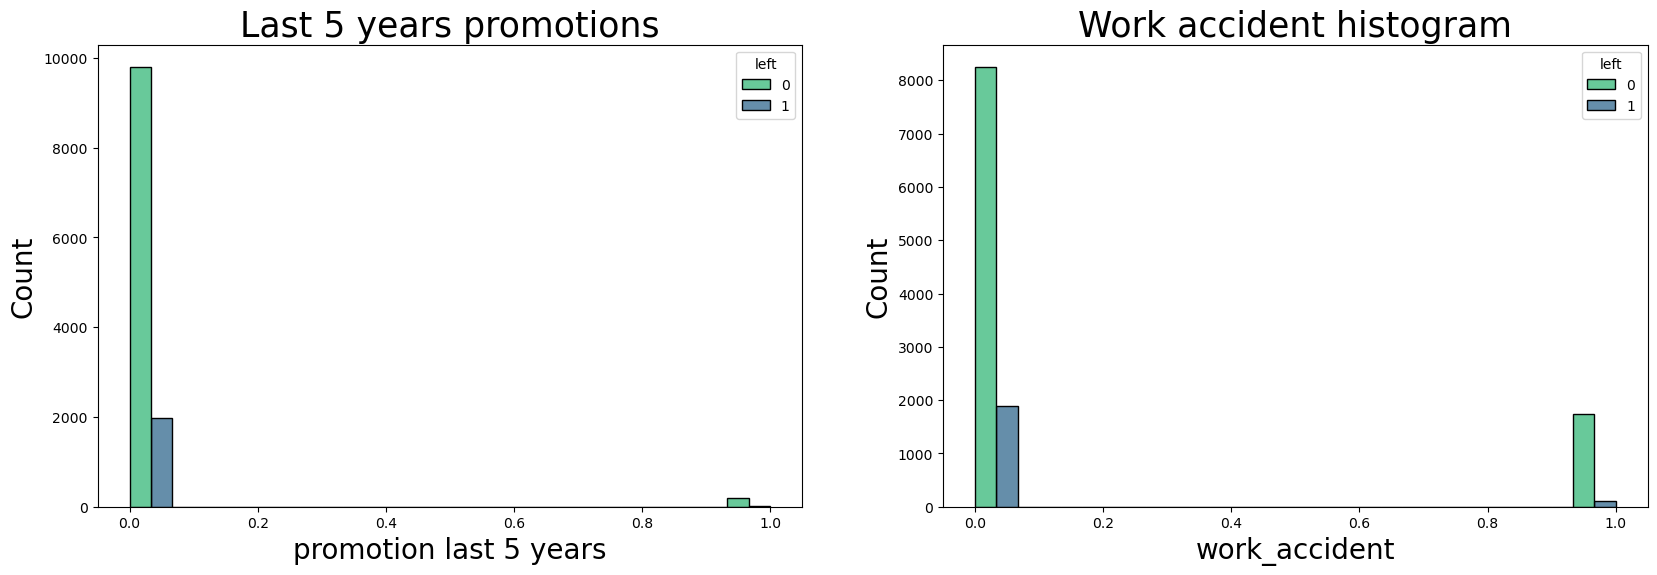

In [37]:
# Checking last 5 years promotions over work accident histogram
fig, ax = plt.subplots(1, 2, figsize = (20,6))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['promotion_last_5years']
tenure_left = df1[df1['left']==1]['promotion_last_5years']
sns.histplot(data=df1, x='promotion_last_5years', hue='left', multiple='dodge', shrink=1, ax=ax[0], palette = "viridis_r")
ax[0].set_title('Last 5 years promotions', fontsize='25')
ax[0].set_ylabel("Count", fontsize=20)
ax[0].set_xlabel("promotion last 5 years", fontsize=20)
# sns.set_theme(style="whitegrid", palette="pastel")


# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['work_accident']
tenure_left = df1[df1['left']==1]['work_accident']
sns.histplot(data=df1, x='work_accident', hue='left', multiple='dodge', shrink=1, ax=ax[1], palette = "viridis_r")
ax[1].set_title('Work accident histogram', fontsize='25')
ax[1].set_ylabel("Count", fontsize=20)
ax[1].set_xlabel("work_accident", fontsize=20)

Left plot:\
    I'm not able to see whether there's an appreciable difference in the 1/0 ratios (left\right)
    Of course values are on 0 or 1.

Right plot:\
    Here yes, but better check.
    Of course values are on 0 or 1.

In [38]:
prom_1 = df1["promotion_last_5years"].value_counts(normalize = True)[1]
not_prom_1 = df1["promotion_last_5years"].value_counts(normalize = True)[0]
print("Among those that left:")
print(f'Not promoted: {not_prom_1}, \nPromoted: {prom_1}')
print(" ")


prom_0 = df1["work_accident"].value_counts(normalize = True)[1]
not_prom_0 = df1["work_accident"].value_counts(normalize = True)[0]
print("Among those that remained:")
print(f'Not promoted: {not_prom_0}, \nPromoted: {prom_0}')

print(" ")
diff = (prom_0 / prom_1)*100
print(f'The percentage of people that remain after being promoted is {diff:.2f}% higher than those that left.')

Among those that left:
Not promoted: 0.9830706363105662, 
Promoted: 0.016929363689433742
 
Among those that remained:
Not promoted: 0.8457176215494955, 
Promoted: 0.15428237845050455
 
The percentage of people that remain after being promoted is 911.33% higher than those that left.


##########################################################################################################################################################\
##########################################################################################################################################################\
##########################################################################################################################################################\

Let's build some models to predict the data

### Logistic regression


In [39]:
# Reduce the parameters to analyze

df3 = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df3['salary'] = (
    df3['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df3 = pd.get_dummies(df3, drop_first=False)

# Display the new dataframe
df3.tail()

satisfaction_level  last_evaluation  number_project  \
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  left  \
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years  salary  department_IT  department_RandD  \
11995                      1       2              0                 0   
11996                      1       2              0                 0   
11997                      1       2              0                 0   
11998                      1       2              0                 0   
11999                      0       0              1                 0   

       department_accounting  department_hr  department_management  \
11995                      0              0                      1   
11996                      0              0                      1   
11997                      0              0                      1   
11998                      0              0                      0   
11999                      0              0                      0   

       department_marketing  department_product_mng  department_sales  \
11995                     0                       0                 0   
11996                     0                       0                 0   
11997                     0                       0                 0   
11998                     1                       0                 0   
11999                     0                       0                 0   

       department_support  department_technical  
11995                   0                     0  
11996                   0                     0  
11997                   0                     0  
11998                   0                     0  
11999                   0                     0

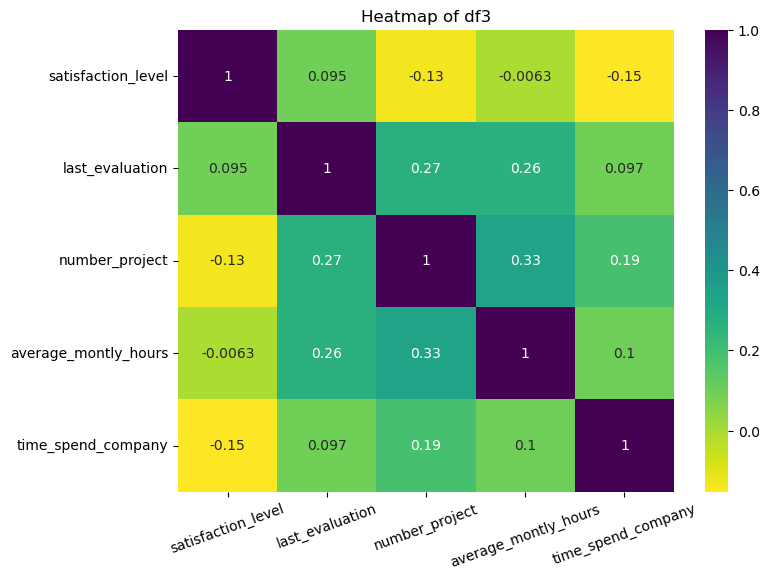

In [40]:
# Heatmap with reduced parameters
plt.figure(figsize=(8, 6))
sns.heatmap(df3[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
            .corr(), annot=True, cmap="viridis_r")
plt.title('Heatmap of df3')
plt.xticks(rotation='20')
plt.show()

Let's remove the outliers 

In [41]:
df3_logreg = df3[(df3['time_spend_company'] >= lower_limit) & (df3['time_spend_company'] <= upper_limit)]
df3_logreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_montly_hours    11167 non-null  int64  
 4   time_spend_company      11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   left                    11167 non-null  int64  
 7   promotion_last_5years   11167 non-null  int64  
 8   salary                  11167 non-null  int8   
 9   department_IT           11167 non-null  uint8  
 10  department_RandD        11167 non-null  uint8  
 11  department_accounting   11167 non-null  uint8  
 12  department_hr           11167 non-null  uint8  
 13  department_management   11167 non-null  uint8  
 14  department_marketing    11167 non-null

In [42]:
y = df3_logreg['left']
X = df3_logreg.drop('left', axis=1)

# y.head() 
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   

   time_spend_company  work_accident  promotion_last_5years  salary  \
0                   3              0                      0       0   
2                   4              0                      0       1   
3                   5              0                      0       0   
4                   3              0                      0       0   
5                   3              0                      0       0   

   department_IT  department_RandD  department_accounting  department_hr  \
0              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   
5              0                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [43]:
from sklearn.linear_model import LogisticRegression

# Divide the data into train and test groups and set up LogisticRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

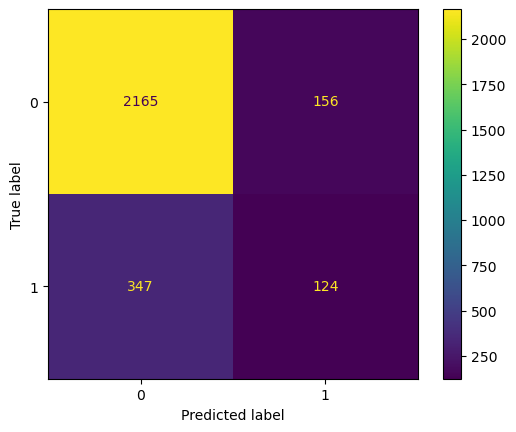

In [44]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

True negatives are good. False positives and false negative are not good. Even worse the true positives.
What are we talking about?

1. True negatives: People who did not leave, accurately predicted by the model
2. True positives: People who did leave, accurately predicted by the model
3. False positives: People who did not leave, unaccurately predicted by the model (due to which they were leaving)
4. False negatives: People who did leave, unaccurately predicted by the model (due to which they were not leaving)

In [45]:
df3_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

df3_logreg it's a bit unbalanced, but it's not that bad.\
Let's create an **classification report** to use for a **logistic regression model**:

In [46]:
from sklearn.metrics import classification_report

target_names = ['Not leaving', 'leaving']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not leaving       0.86      0.93      0.90      2321
     leaving       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



REMINDER:

- **Precision** proportion of data points predicted as True that are actually True.
- **Recall** proportion of data points predicted as True, out of all the data points that are actually True.
- **Accuracy** proportion of data points that are correctly classified.
- **F1-score** aggregation of precision and recall.
- **AUC**: area under the ROC curve; probability that a model ranks a random positive example more highly than a random negative example.


I do not like this. I was interested in looking to those that were leaving. This model is not good.\
I'll try with a:

### Tree model

In [47]:
# Dependent variable
y = df3_logreg['left']
y.head(3)

0    1
2    1
3    1
Name: left, dtype: int64

In [48]:
# Features
X = df3_logreg.drop('left', axis=1)
X.head(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Dictionary of hyperparameters
cv_params = {'max_depth':[2, 3, 4, 5, 6, 8, 10, None],
             'min_samples_leaf': [1, 2, 3, 4 ,5, 10],
             'min_samples_split': [2, 3, 4, 6, 8]
             }

# Dictionary of scoring metrics
scoring = ['accuracy', 'precision', 'f1', 'roc_auc', 'recall']

# Instantiate GridSearch
tree = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Let's fit.

In [50]:
%%time
tree.fit(X_train, y_train)

CPU times: user 29.7 s, sys: 570 ms, total: 30.3 s
Wall time: 30.6 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                         'min_samples_split': [2, 3, 4, 6, 8]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'f1', 'roc_auc', 'recall'])

In [51]:
# Best parameters
tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [52]:
# Best AUC score achieved
tree.best_score_

0.9743823751317063

Good number. We're happy.\
Let's write a function to ease the understanding of the model

In [53]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): how to call the model
        model_object: fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a df(pandas) with F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [54]:
# Get all CV scores
tree_cv_results = make_results('decision tree cv', tree, 'auc')
tree_cv_results

model  precision   recall        F1  accuracy       auc
0  decision tree cv   0.955522  0.91497  0.934765  0.978508  0.974382

Good.\
Since decision trees can be vulnerable to overfittinf, I'll create a random forests to avoid it (r.f. has multiple trees)

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Dictionary of hyperparameters
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 

# Dictionary of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [56]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 25min 22s, sys: 28.6 s, total: 25min 51s
Wall time: 26min 4s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [61]:
path = '/Users/davide/0_Data_science/Github/EDA-ML_on_Analytics_Job_Prediction_dataset/'
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path where save the pickle
        model_object: model to pickle
        save_as:      filename of the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [62]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to read
        saved_model_name: filename 

    Out: 
        model: pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [63]:
write_pickle(path, rf1, 'hr_rf1')
rf1 = read_pickle(path, 'hr_rf1')

In [64]:
# Best AUC score on CV
rf1.best_score_

0.9818158627884357

In [65]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [66]:
#All CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree_cv_results)
print(rf1_cv_results)

              model  precision   recall        F1  accuracy       auc
0  decision tree cv   0.955522  0.91497  0.934765  0.978508  0.974382
              model  precision   recall        F1  accuracy       auc
0  random forest cv   0.970653  0.91497  0.941924  0.981015  0.981816


Good, we had it better with the tree model. Mildly, but still better.

In [67]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  Modelname in output table
        model:                Fit GridSearchCV object
        X_test_data:          X_test data numpy array
        y_test_data:          y_test data numpy array

    Out: df(pandas) of precision, recall, f1, accuracy, and AUC scores
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get predictions on test data
rf1_test_scores = get_scores('random forest test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy      AUC
0  random forest test   0.967033  0.934183  0.950324  0.983524  0.96386

Now I'll incorporate feature engineering to build an improved model. I'll drop 'satisfaction_level' and create a new feature to capture whether an employee is overworked ('overworked': 0 | 1).

In [69]:
df4 = df3.drop('satisfaction_level', axis=1)
df4.head(3)

last_evaluation  number_project  average_montly_hours  time_spend_company  \
0             0.53               2                   157                   3   
1             0.86               5                   262                   6   
2             0.88               7                   272                   4   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0

In [70]:
df4['overworked'] = df4['average_montly_hours']
print('Max hours:', df4['overworked'].max())
print('Min hours:', df4['overworked'].min())

Max hours: 310
Min hours: 96


overworked: more than 175 hours per month.

In [71]:
df4['overworked'] = (df4['overworked'] > 175).astype(int)
df4['overworked'].head(3)

0    0
1    1
2    1
Name: overworked, dtype: int64

In [72]:
df4 = df4.drop('average_montly_hours', axis=1)
df4.head(3)

last_evaluation  number_project  time_spend_company  work_accident  left  \
0             0.53               2                   3              0     1   
1             0.86               5                   6              0     1   
2             0.88               7                   4              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1

In [73]:
y = df4['left']
X = df4.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [76]:
# Instantiating the model
tree = DecisionTreeClassifier(random_state=0)

# Dictionary of hyperparameters
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Dictionary of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [77]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 4.68 s, sys: 106 ms, total: 4.79 s
Wall time: 4.97 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [78]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [79]:
tree2.best_score_

0.9586752505340426

In [80]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree_cv_results)
print(tree2_cv_results)

              model  precision   recall        F1  accuracy       auc
0  decision tree cv   0.955522  0.91497  0.934765  0.978508  0.974382
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


tree model (first one) is still way better.
Let's make another random forest model

In [82]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Dictionary of hyperparameters
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7,0.8,1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [1,2,3,4],
             'n_estimators': [200, 300, 400],
             }  

# Dictionary of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [83]:
%%time
rf2.fit(X_train, y_train) 

/opt/anaconda3/envs/RandomForestClassifier-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/RandomForestClassifier-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/RandomForestClassifier-env/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/RandomForestClassifier-env/lib/python3.8/site-packages/skl

CPU times: user 33min 37s, sys: 31.2 s, total: 34min 9s
Wall time: 34min 34s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 0.8, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [200, 300, 400]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [84]:
write_pickle(path, rf2, 'hr_rf2')
rf2 = read_pickle(path, 'hr_rf2')

In [85]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [86]:
rf2.best_score_

0.9652394144886811

In [87]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.864665  0.879426  0.871654  0.957078  0.965239


In [88]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall       f1  accuracy       AUC
0  random forest2 test   0.871154  0.909639  0.88998  0.962642  0.941419

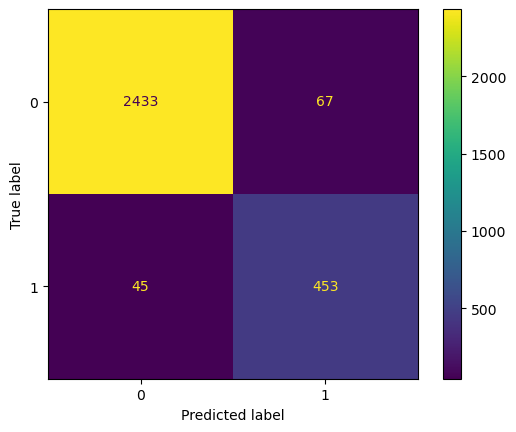

In [89]:
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

This is better, especially finding false negative and positive. Nice, we now have a good model that can predict a good number of true positive and true negative.
 
Below, are reported the "decision process", gini measurment (i.e. the importance of coefficients ,ttps://en.wikipedia.org/wiki/Gini_coefficient), and therefore, are resumed the most imprtant factors this company have to focus in order to keep is talents.

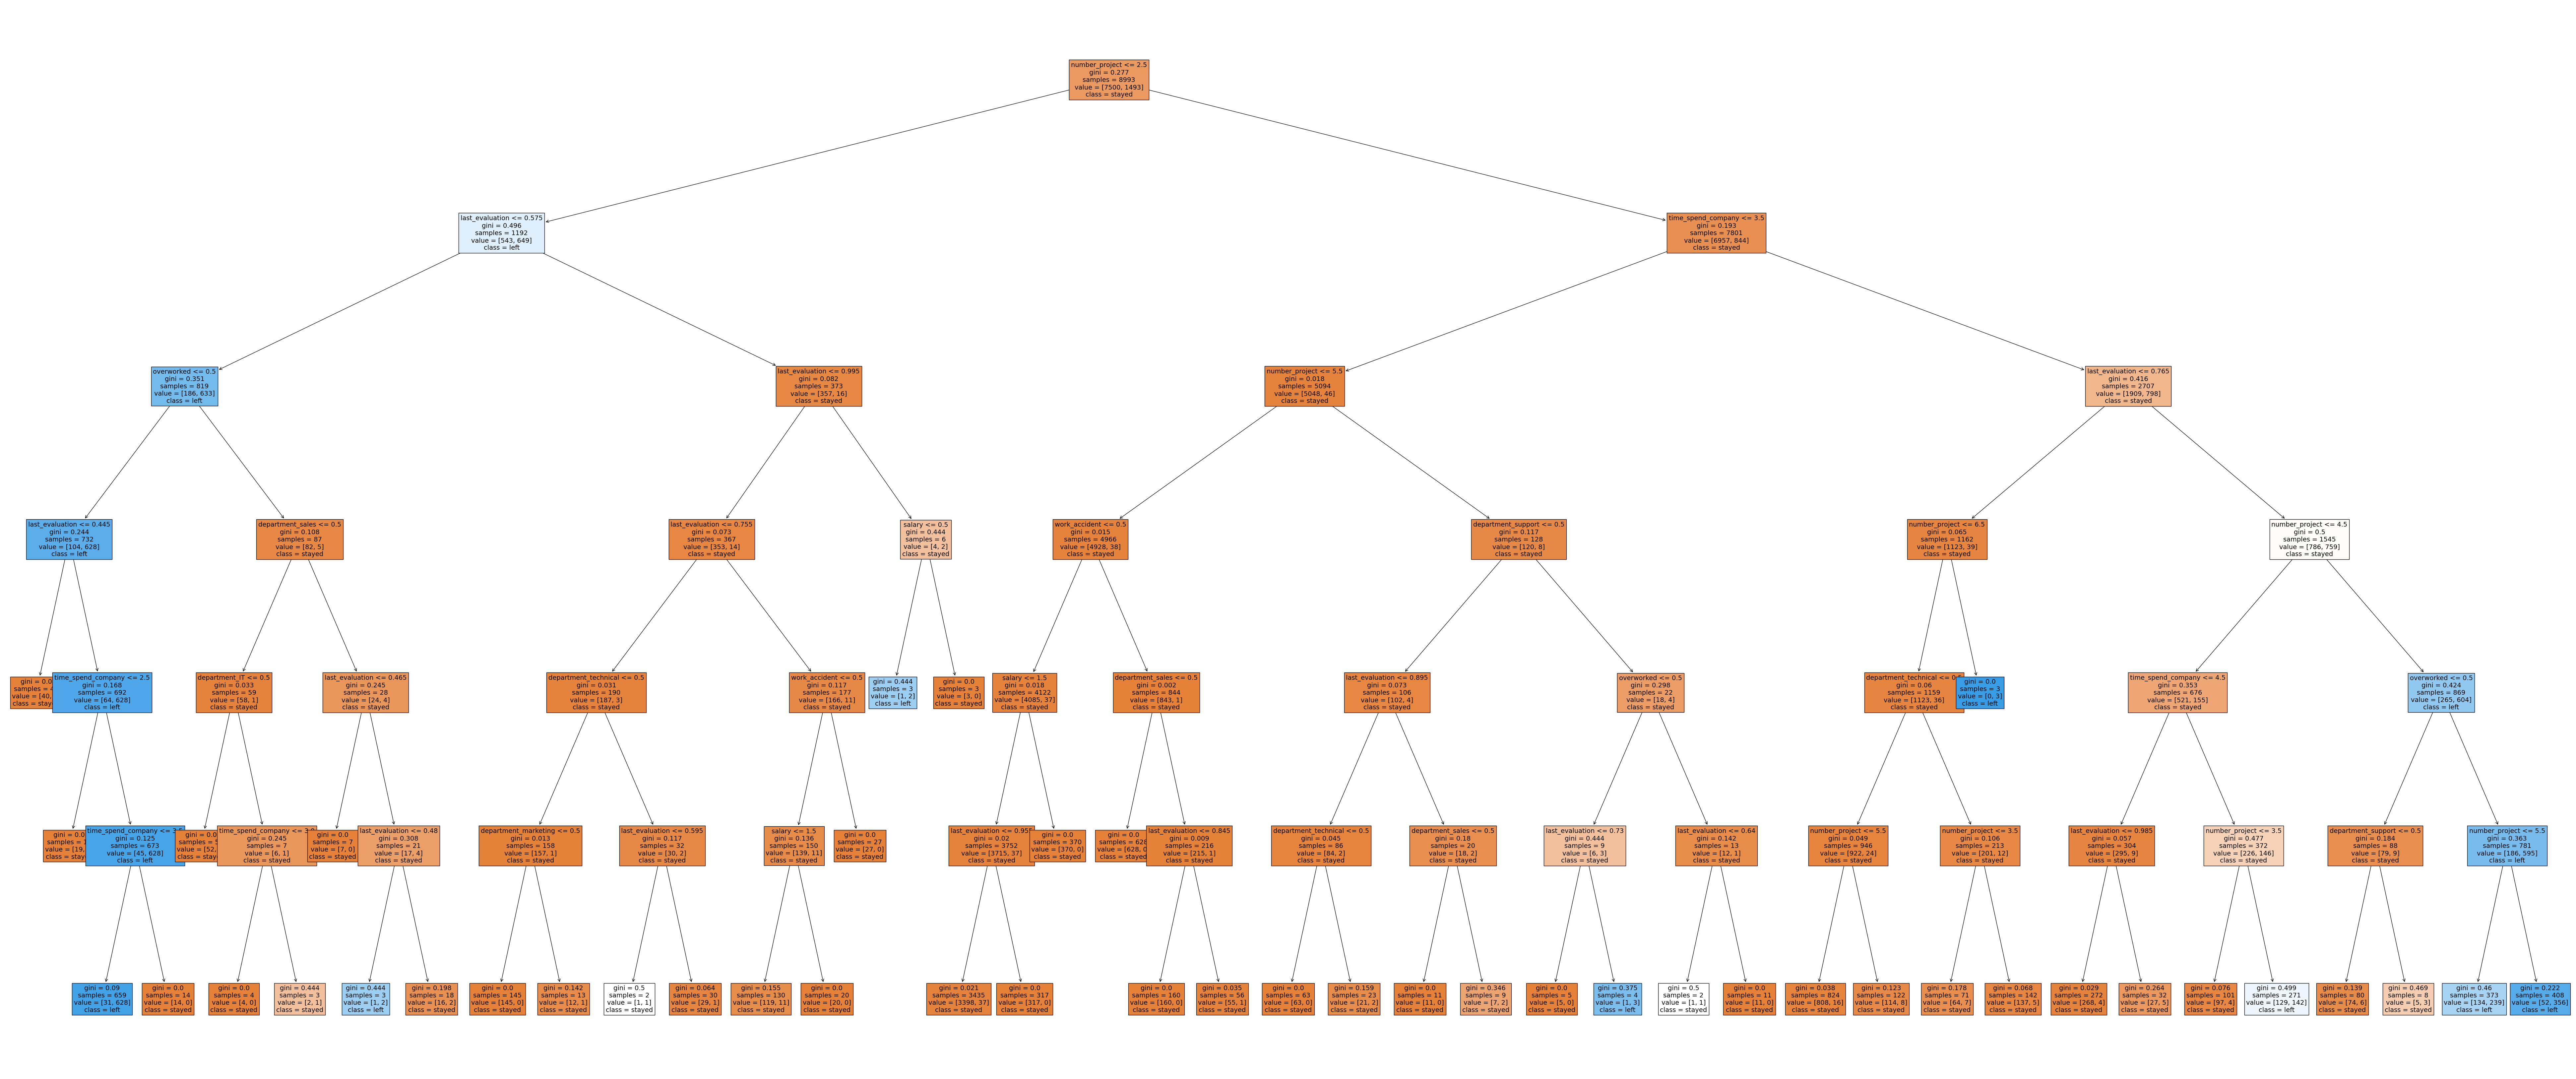

In [91]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,42))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [92]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
time_spend_company           0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

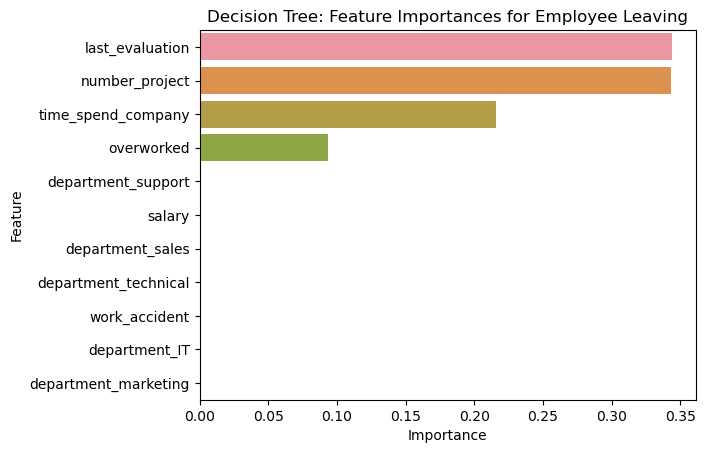

In [95]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

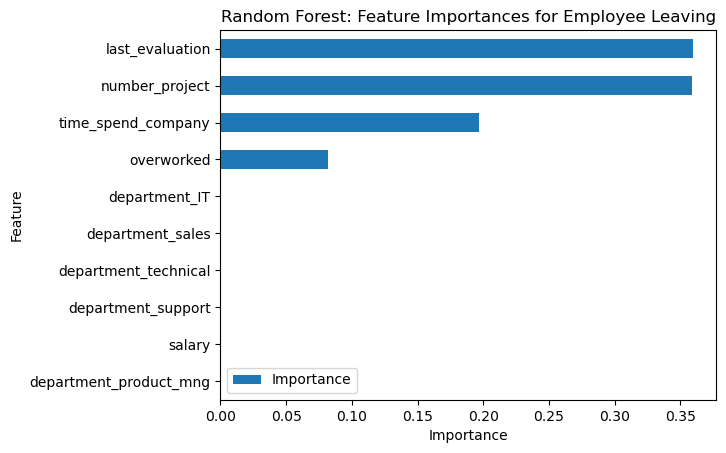

In [96]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

This analysis support the idea that, in ascending order, the most important factor to consider to keep talents are:

- last evaluation
- number of project
- time spent at the company
- overworking

A nice strategy might be the repartition of projects among employees, likewise a better distrubution of tasks. 
Importantly, the last evaluation plays a crucial role. A hiher employee satisfaction will definetly lead to a lower chance of leave. 

Depending on the company possibilities, I'd suggest to lower the work-load on employees and push their involvement in the company activities (hopefully with social events or courses of self-improvement). Regarding the time spent at the company, this might not be reasonably solvable, but appying the aforementioned ideas might yield to a lower importance of this same aspect. 